## Uso de Scilab en un Notebook
Se puede ejecutar y graficar el sistema dinámico RLC para generar los resultados.

a) 
R=1 ohm, L=1Hy, y C=1F. 
Empleando la solución analítica, simular 3 segundos con una entrada de tensión escalón de 12V


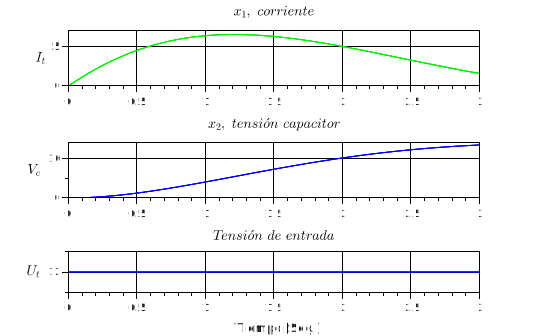

In [1]:
//clear();
t_etapa=1e-3;
tF=3;
t = 0:t_etapa:tF;
acc(1:3001) = 12;

x1 = 8.*sqrt(3) .* exp(-t/2) .* sin ( sqrt(3).*t / 2);  // Corriente en el circuito
x2 = 12-8.*sqrt(3) .* exp(-t/2) .* sin ( sqrt(3).*t / 2 +%pi/3);  // Tensión en el capacitor

subplot(3,1,1);
plot(t,x1,'Color', '#00F000');
title('$x_1, \ corriente$'); 
ylabel('$I_t$','fontsize',3,'rotation',0);
xgrid;

subplot(3,1,2); 
plot(t,x2);
title( '$x_2,\ tensión \ capacitor$');
ylabel('$V_c$','fontsize',3,'rotation',0);
xgrid;

subplot(3,1,3);
plot(t,acc);
title('$Tensión \ de \ entrada$');
xlabel('Tiempo [Seg.]');
ylabel('$U_t$','fontsize',3,'rotation',0);
xgrid;


Definiendo la rutina que ejecuta el Euler
Para  R=1;L=1;C=1;

In [2]:
function [X] = modrlc_1(t_etapa, xant, accion)
 h=1e-4;
 R=1;L=1;C=1;

 A=[-R/L, -1/L;1/C,0];B=[1/L;0];
 C=[R 0];
 u=accion;
 x=xant;
 
 for ii=1:t_etapa/h
  xp=A*x+B*u;
  x=x+xp*h;
 end
 X=[x];    
endfunction

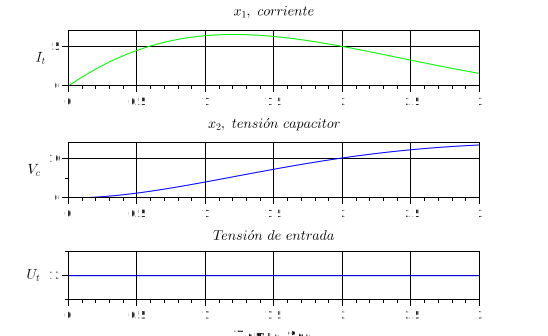

In [3]:
X=[0; 0];
ii=0;
t_etapa=1e-3;
tF=3;
u=12;
ii=0;

for t=0:t_etapa:tF
  ii=ii+1;
  x1e1(ii)=X(1); //corriente
  x2e1(ii)=X(2); //tensión en el capacitor
  X=modrlc_1(t_etapa, X, u);
  acce1(ii)=u;
end
t=0:t_etapa:tF;

subplot(3,1,1);
plot(t,x1e1,'color','#00f000');
title('$x_1, \ corriente$'); 
ylabel('$I_t$','fontsize',3,'rotation',0);
xgrid;

subplot(3,1,2);
plot(t,x2e1);
title( '$x_2,\ tensión \ capacitor$');
ylabel('$V_c$','fontsize',3,'rotation',0);
xgrid;

subplot(3,1,3);
plot(t,acce1); 
title('$Tensión \ de \ entrada$');
xlabel('Tiempo [Seg.]');
ylabel('$U_t$','fontsize',3,'rotation',0);
xgrid;

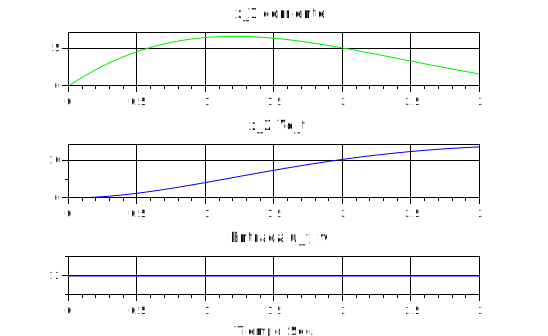

In [4]:
R= 1;L=1;C=1; // Valores R-L-C actividad 1
A1=[-R/L -1/L ; 1/C 0];
B1= [1/L ; 0]; 
//C=[R 0];
C1=[1 0 ; 0 1];   // La salida son las variables de estado Is y Vc
D1=0;
t_etapa = 1e-3;
tF = 3; // Segundos, tiempo total simulación

Sl=syslin('c',A1,B1,C1);    //  Sistema lineal 
t1 = 0:t_etapa:tF;	 
u1=ones(1,length(t1))*12;  // Entrada, escalón de 12 V
y1 =csim(u1,t1,Sl) ;  // se obtiene una matriz de 2 filas, una para cada salida 

subplot(3,1,1);
plot(t1,y1(1,:),'color','#00f000');
title('x_1 corriente'); 
xgrid;

subplot(3,1,2);
plot(t1,y1(2,:));     // Tensión capacitor
title('x_2 Vc_t');
xgrid;

subplot(3,1,3);
plot(t1,u1); 
title('Entrada u_t, v');
xlabel('Tiempo [Seg.]')
xgrid;

Definiendo la rutina que ejecuta el Euler
Para R=2200;L=10e-6;C=100e-9;

In [5]:
function [X] = modrlc_2(t_etapa, xant, accion)
 h=1e-9;
 R=2200;L=10e-6;C=100e-9;

 A=[-R/L, -1/L;1/C,0];B=[1/L;0];
 C=[R 0];
 u=accion;
 x=xant;
 
 for ii=1:t_etapa/h
  xp=A*x+B*u;
  x=x+xp*h;
 end

 X=[x];    
endfunction


Ahora se puede llamar a ésta rutina y almacenar cada resultado que devuelve.

In [6]:
tF=1e-3;u=0;
X=-[0; 0];
ii=0;
t_etapa=1e-7;

for t=0:t_etapa:tF
    ii=ii+1;
    X=modrlc_2(t_etapa,X,u);
    x1e2(ii)=X(1);
    x2e2(ii)=X(2);
    acce2(ii)=u;
    u=12;
end

t=[0:t_etapa:tF]';

Finalmente, se muestran los resultados de cada variable de interés.

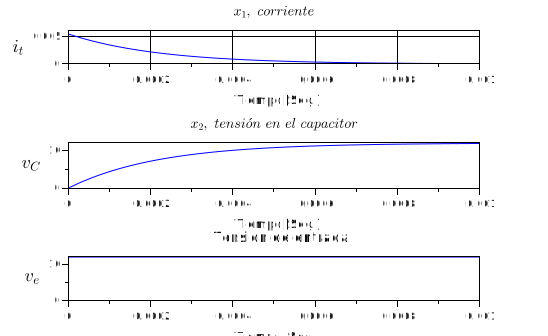

In [7]:
subplot(3,1,1);
plot(t,x1e2);
title ( '$x_1,\ corriente$','fontsize',3);
xlabel('Tiempo [Seg.]','fontsize',2)
ylabel('$i_t$','fontsize',4,'rotation',0);
xgrid;

subplot(3,1,2);
plot(t,x2e2,'-');
title ( '$x_2 ,\ tensión\ en\ el\ capacitor$','fontsize',3);
xlabel('Tiempo [Seg.]','fontsize',2)
ylabel('$v_C$','fontsize',4,'rotation',0);

subplot(3,1,3);
plot(t,acce2);
title ( "Tensión de entrada" , 'fontsize',3);
xlabel('Tiempo [Seg.]','fontsize',2)
ylabel('$v_e$','fontsize',4,'rotation',0);